In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.append('D:/thesis/src')
from two_level_clustering.Monitor import Monitor
from two_level_clustering.Utils import RectangularLattice, generate_mixture
from two_level_clustering.SOCEM import SOCEM
from two_level_clustering.PbSOMClustering import PbSOMClustering
from two_level_clustering.Merging import Merging

from sklearn import metrics

mpl.rcParams['figure.dpi'] = 300

### Demonstation of entropy plot usage

In [2]:
def model_info(model_labels, true_labels):
    # Function that shows crosstab of cluster and actual labels

    df = pd.DataFrame({'clust_label': model_labels, 'orig_label': true_labels})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    display(ct)

def clustering_quality_labeled(y_true, y_pred):
    print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_true, y_pred))
    print("Normalized Mutual Information:", metrics.normalized_mutual_info_score(y_true, y_pred))
    print("Adjusted Mutual Information:", metrics.adjusted_mutual_info_score(y_true, y_pred))
    print("V-Measure:", metrics.v_measure_score(y_true, y_pred))
    print("Fowlkes-Mallows Score:", metrics.fowlkes_mallows_score(y_true, y_pred))

def clustering_quality(X, y_pred):
    print("Silhouette Score:", metrics.silhouette_score(X, y_pred))
    print("Calinski-Harabasz Index:", metrics.calinski_harabasz_score(X, y_pred))
    print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, y_pred))

### Data

In [3]:
n_samples = 500

# Define the parameters for the 2D Gaussian finite mixture
means = np.array([[-1, -2], [2, -5], [3.2, 6.2], [9.7, 4.7], [10, -3]])

# Define covariances for each component
covariances = np.array([[[1, 0], [0, 1]],  
                        [[1, 0.5], 
                         [0.5, 1]],  
                        [[1.1, 0.3], 
                         [0.3, 1]],
                        [[1.2, -0.9], [-0.9, 1.5]],
                        [[1, -0.9], [-0.9, 1]]])

probabilities = np.array([0.2, 0.15, 0.35, 0.2, 0.1])

In [4]:
data, labels = generate_mixture(means, covariances, probabilities, n_samples)

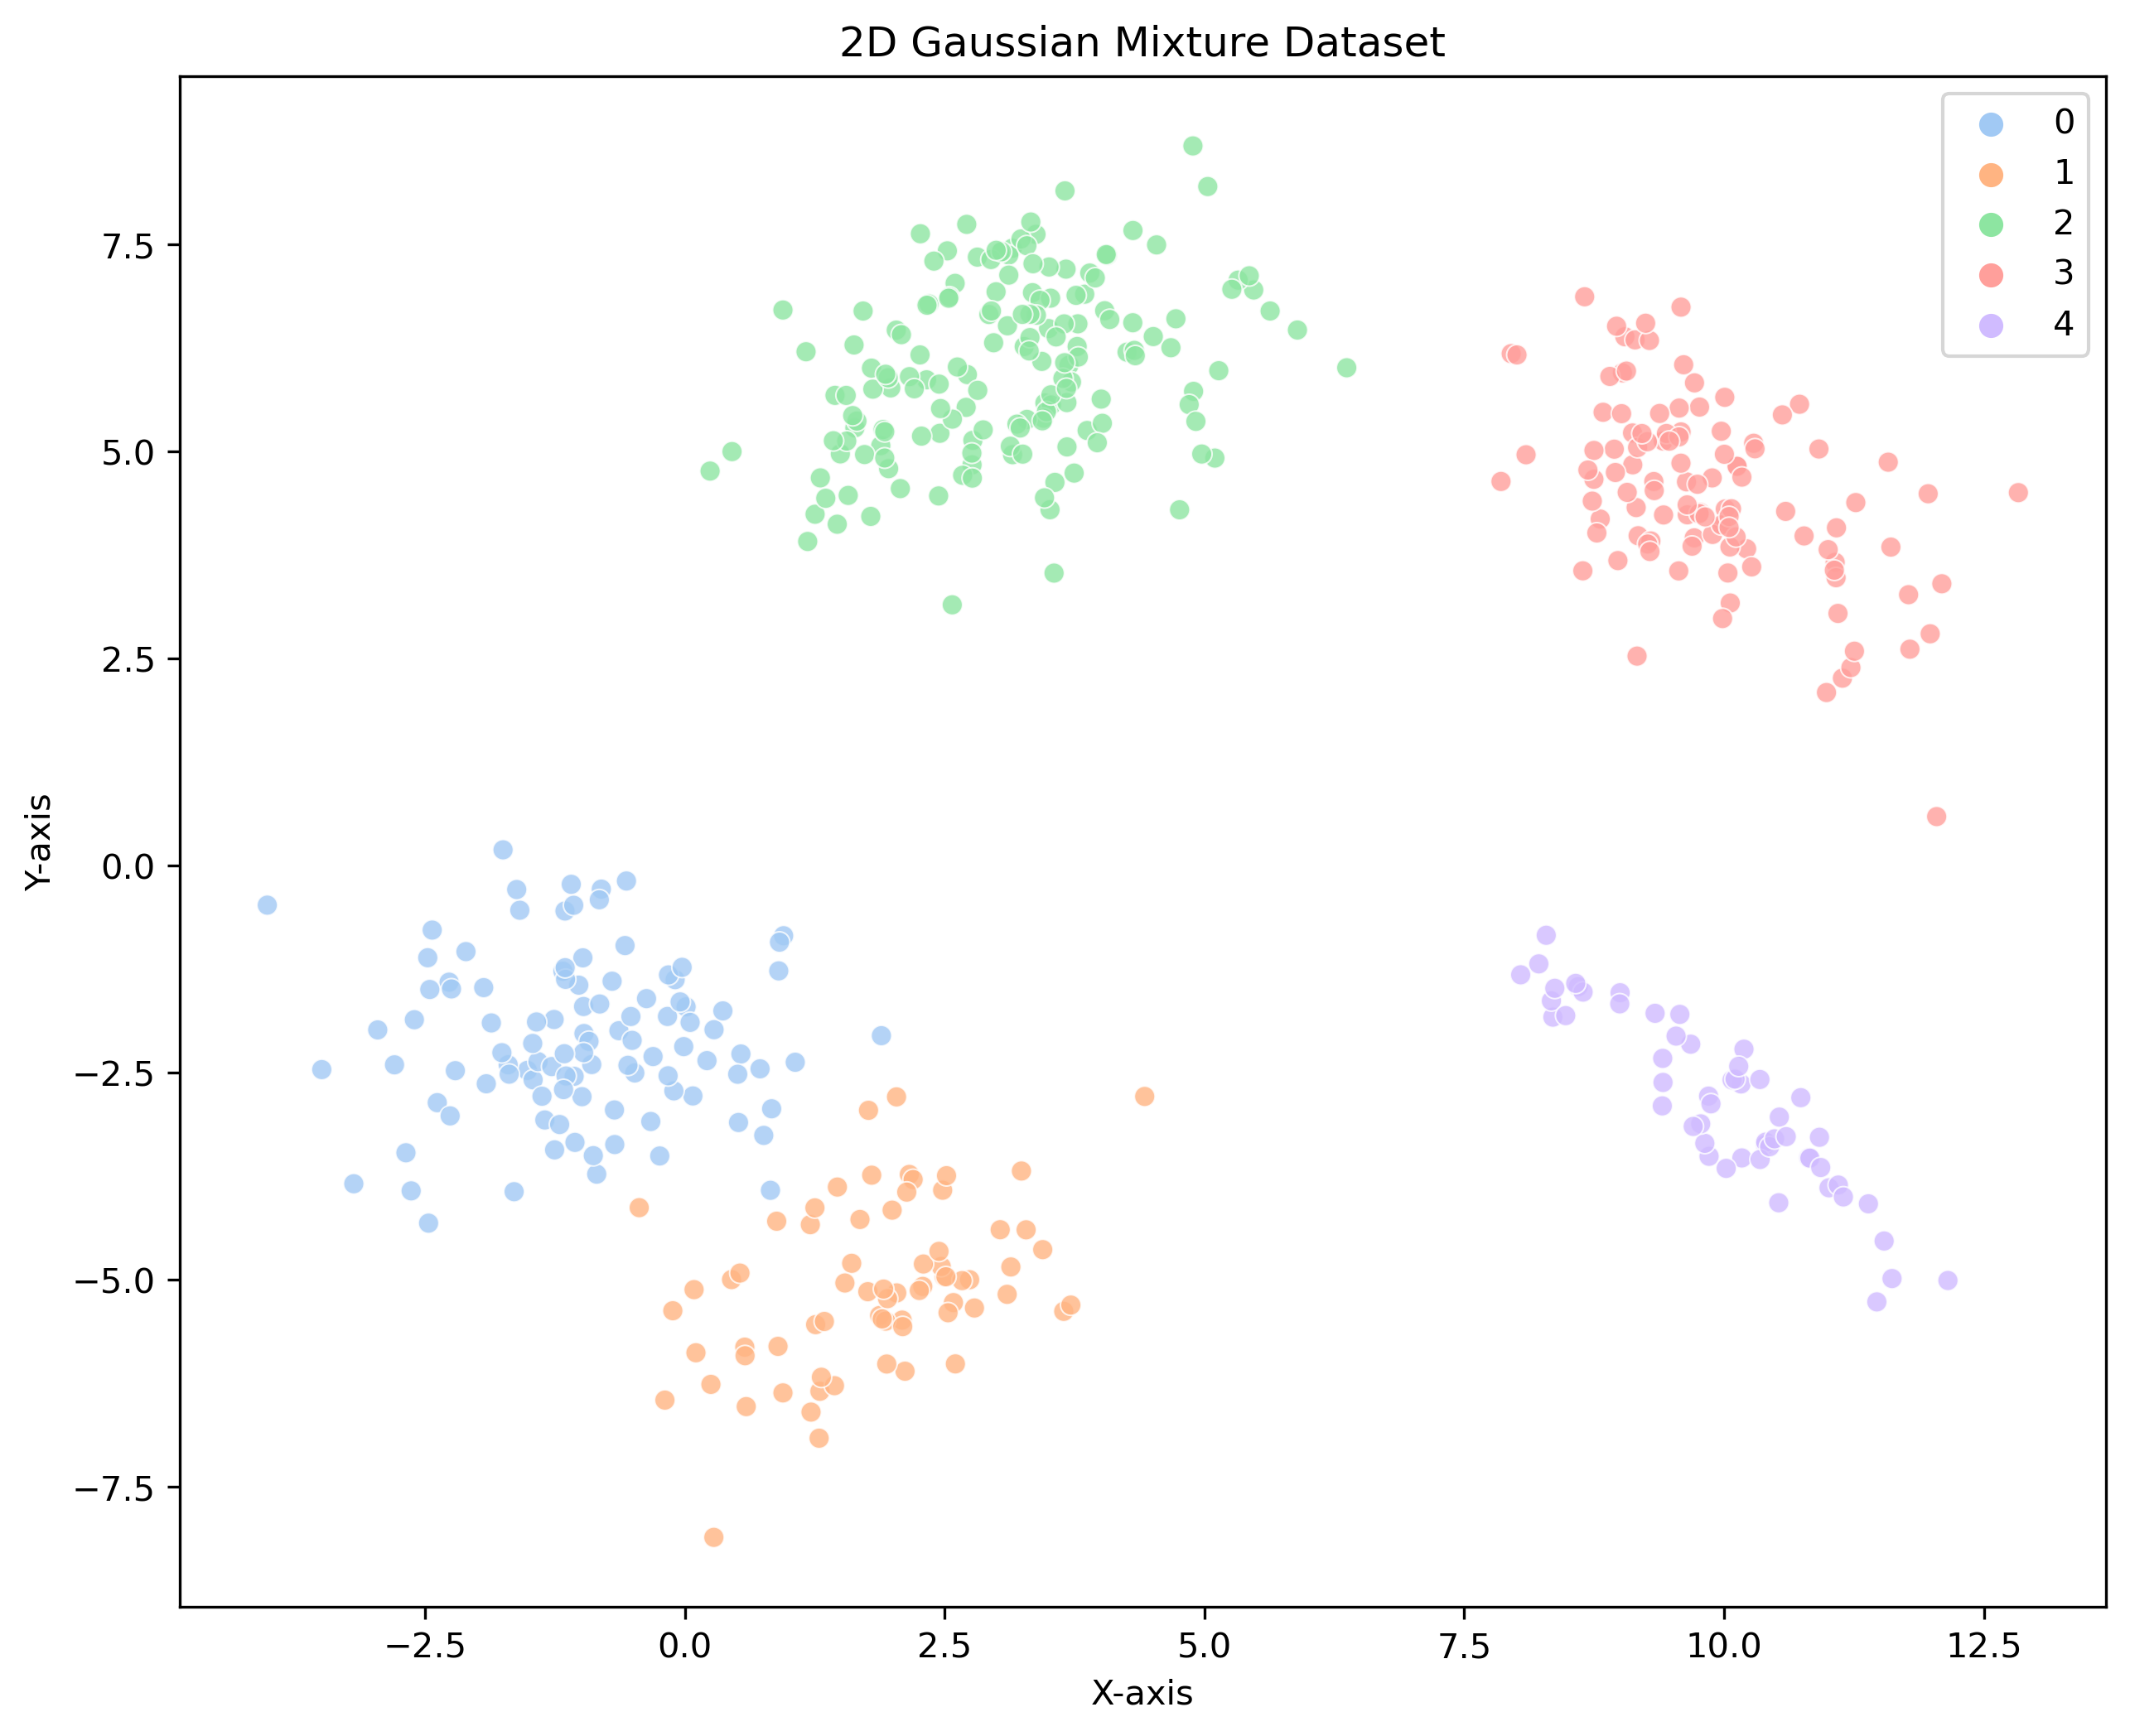

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

# Generate data points from the 2D Gaussian mixture

custom_palette = sns.color_palette("pastel", len(np.unique(labels)))

# Visualize the generated data
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax, palette=custom_palette)

# for mean, color in zip(means, custom_palette):
#     ax.plot(mean[0], mean[1], color=color, markersize=14, marker='*')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Mixture Dataset');

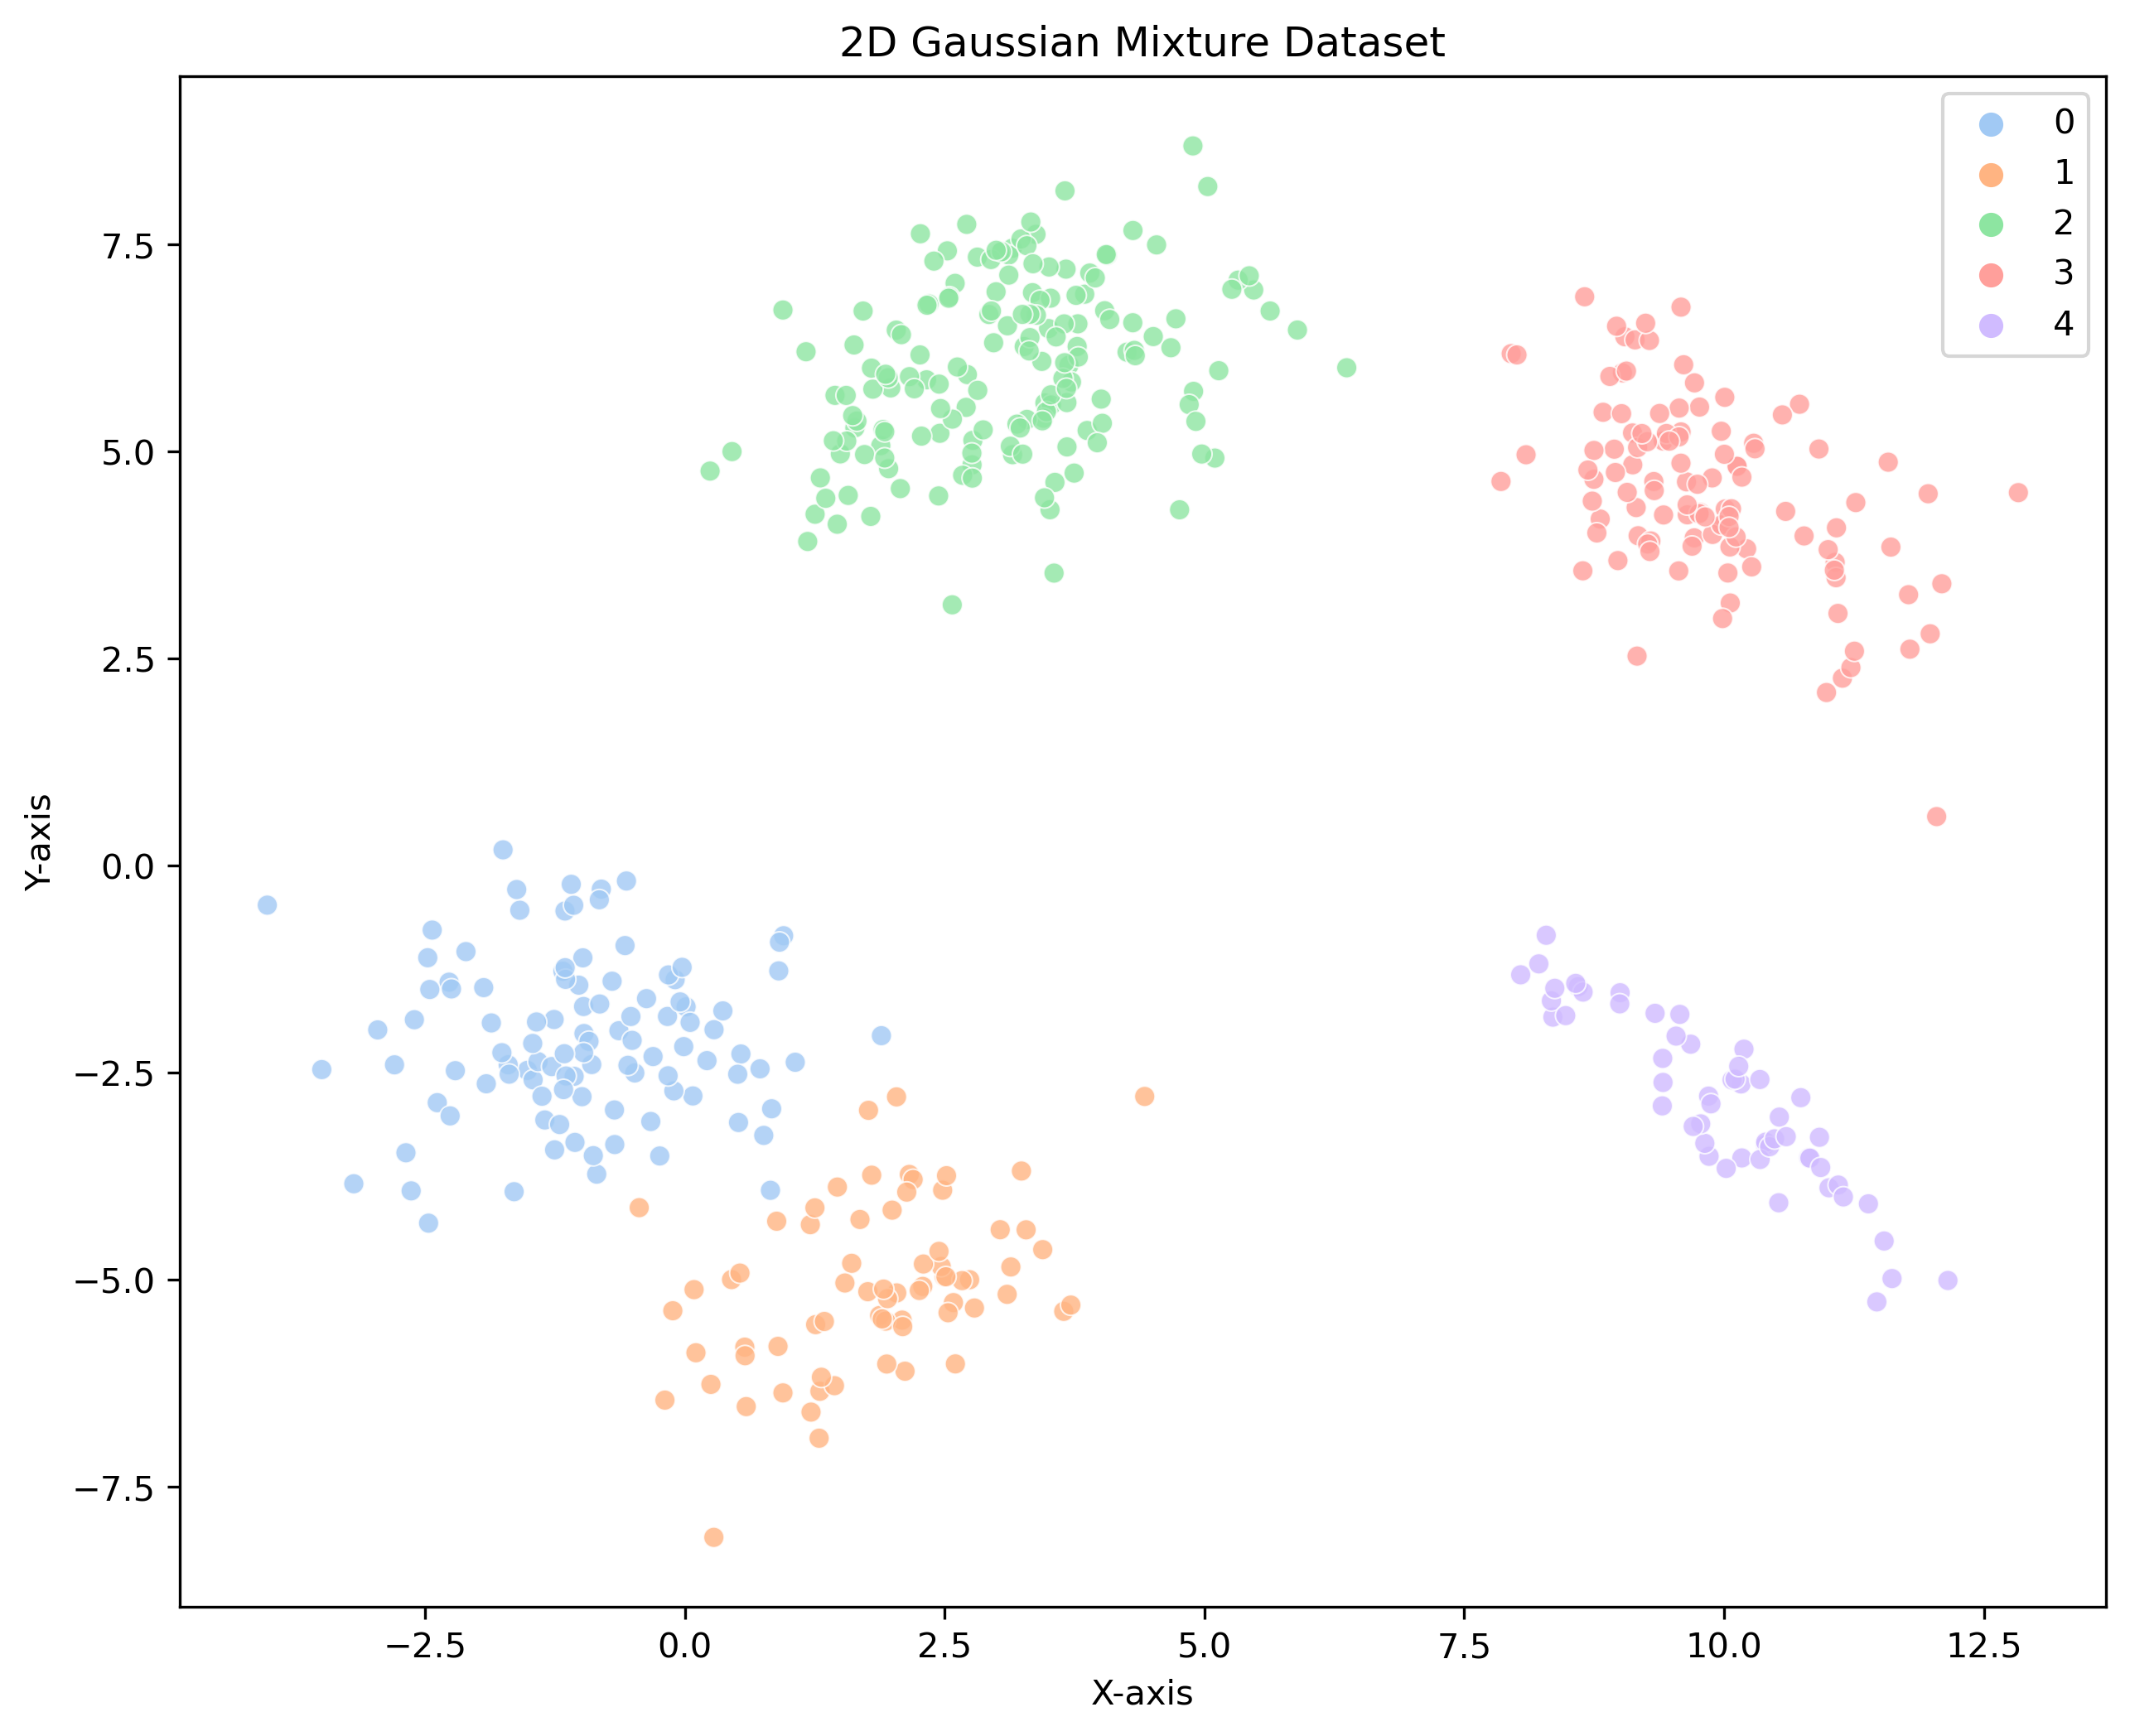

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

# Generate data points from the 2D Gaussian mixture

custom_palette = sns.color_palette("pastel", len(np.unique(labels)))

# Visualize the generated data
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax, palette=custom_palette)

# for mean, color in zip(means, custom_palette):
#     ax.plot(mean[0], mean[1], color=color, markersize=14, marker='*')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Mixture Dataset');

### First part

In [7]:
k = 5
lattice = RectangularLattice((k, k))
som = SOCEM(lattice, sigma_start = 0.8, sigma_step = 0.02, max_iter=50, tol=1e-6, betta=0.4, cov_type='spherical', random_state=None, use_weights=False)

In [8]:
monitor = Monitor(som)
som.fit(data, monitor)

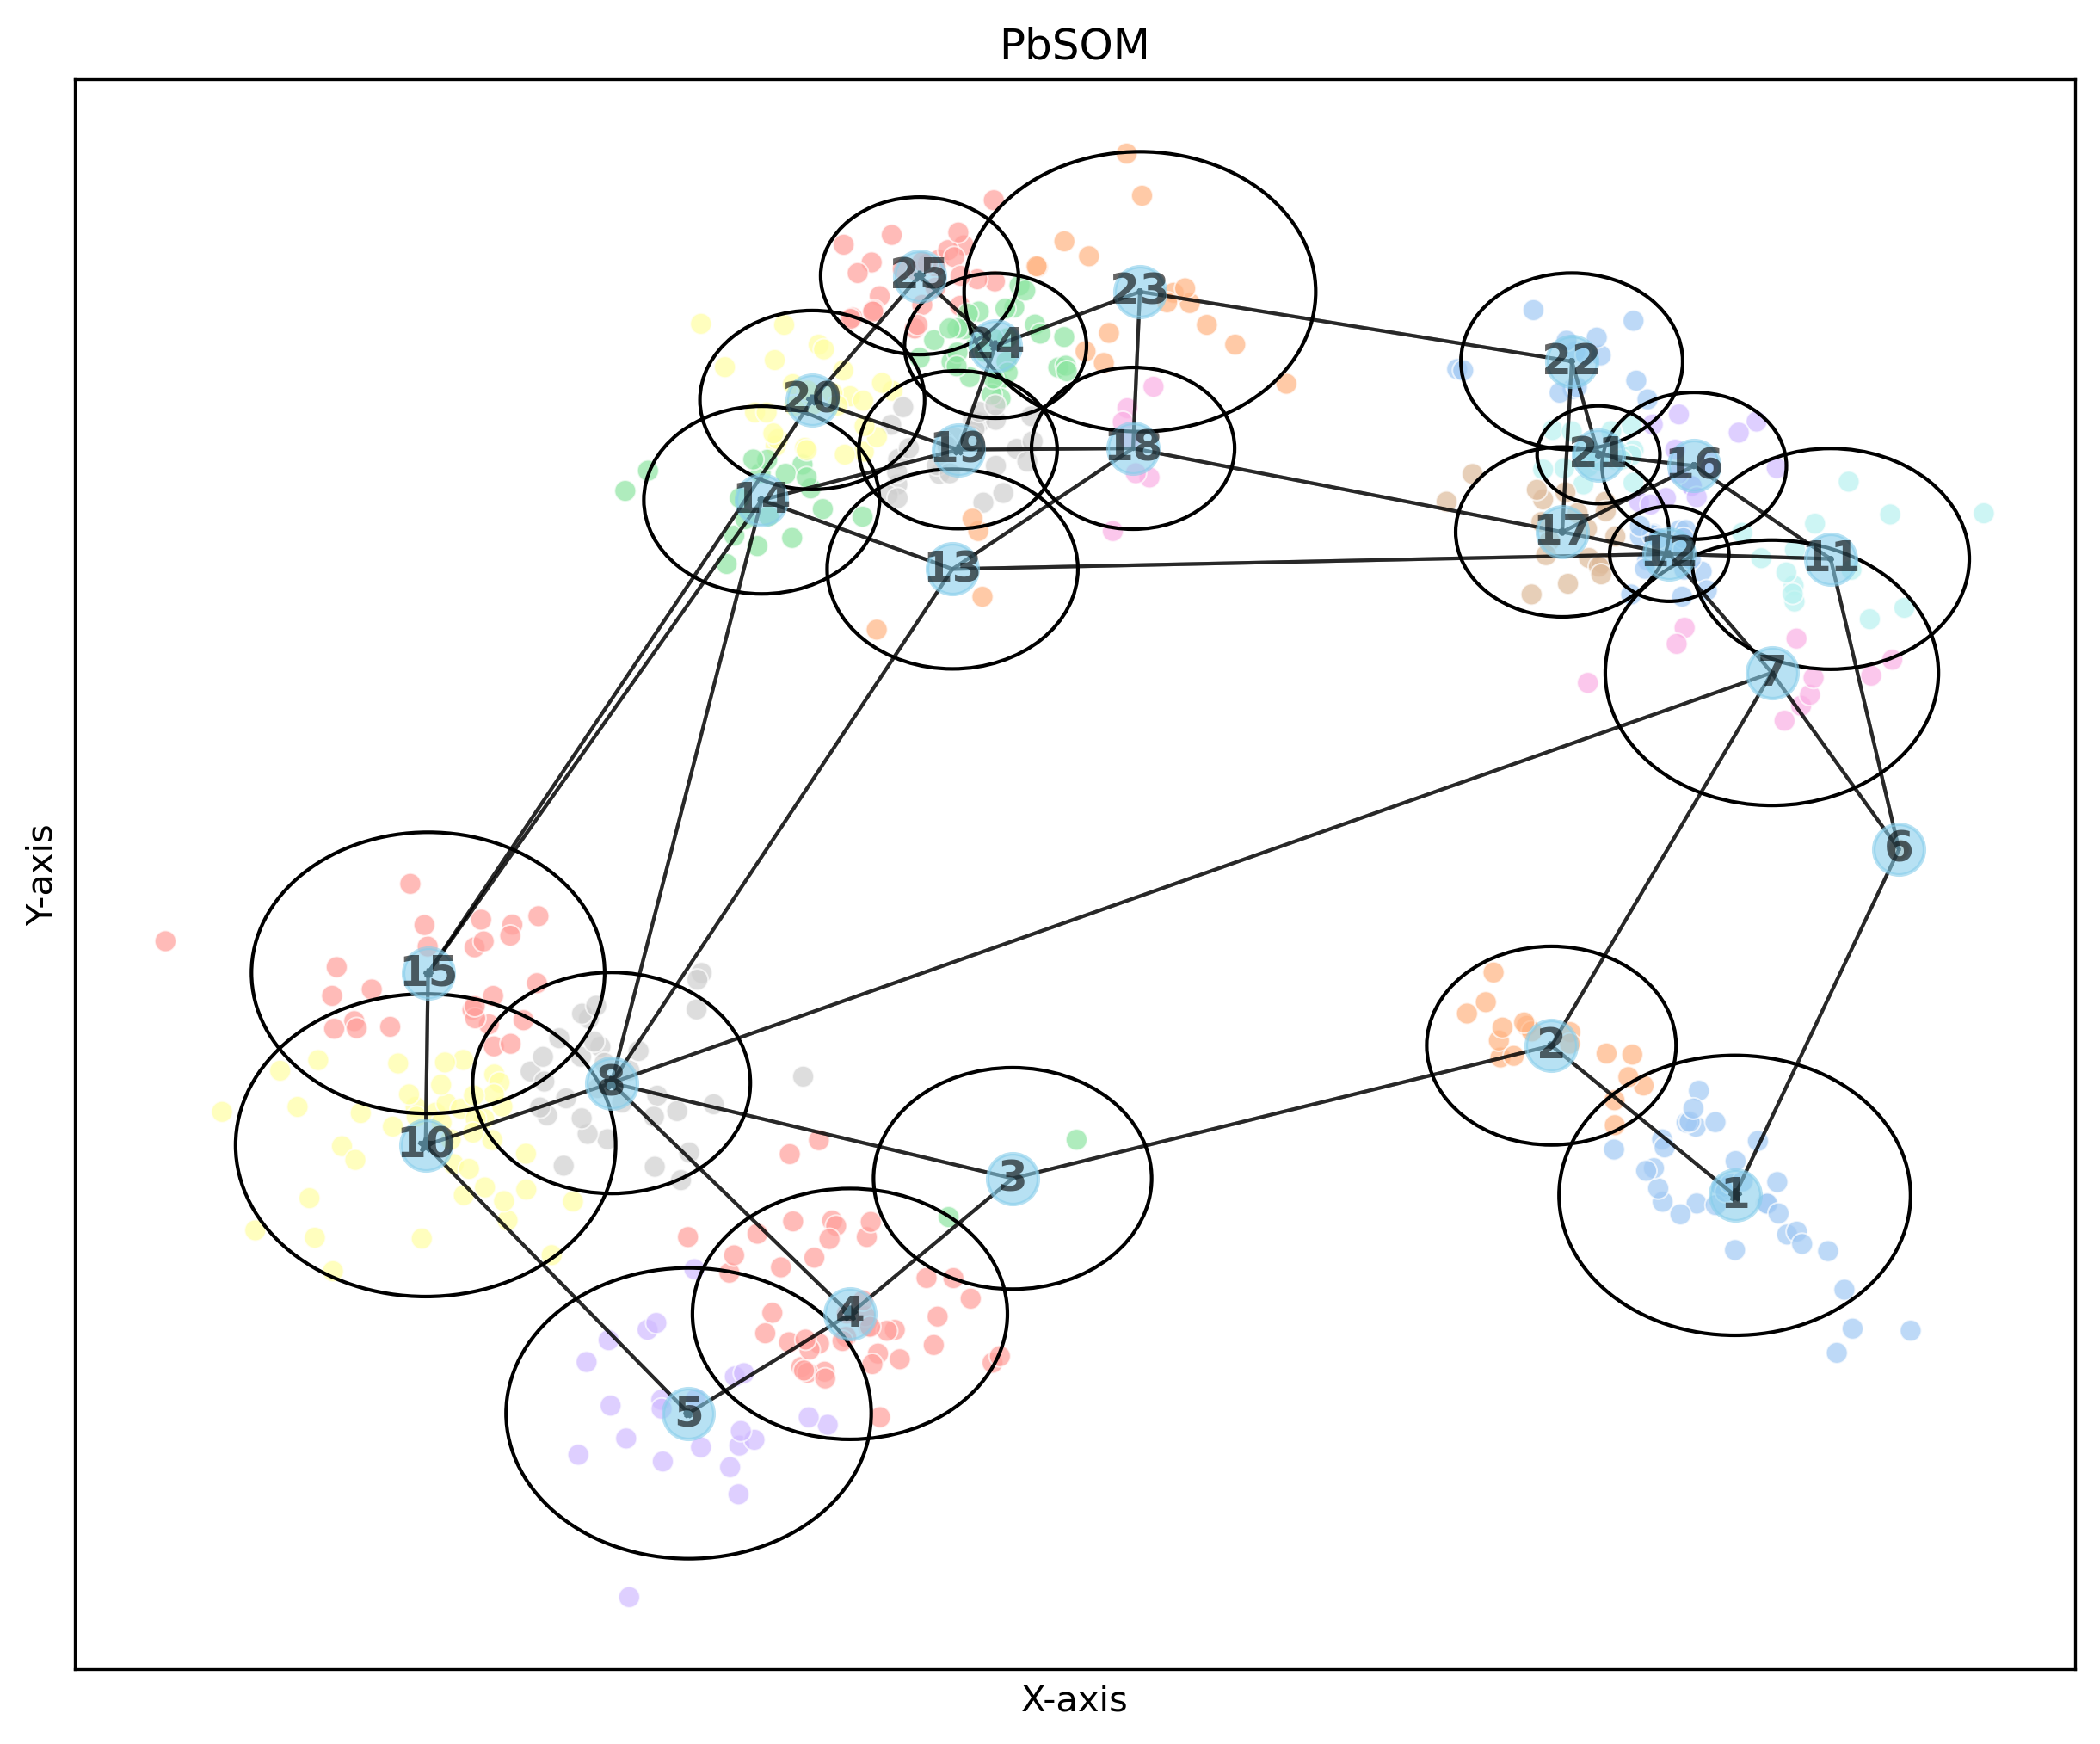

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

monitor.draw(ax, 'PbSOM', monitor.idx_-1, data, None, "pastel", shift_enumeration=True)
ax.get_legend().remove()

In [10]:
y_pred = som.predict(data)

In [11]:
clustering_quality(data, y_pred)

Silhouette Score: 0.37284702654344776
Calinski-Harabasz Index: 1377.5646886716172
Davies-Bouldin Index: 0.8134391747134376


### Second part

In [12]:
em_reduction = PbSOMClustering(som)

In [13]:
em_reduction.fit(data)

Best pair:4, 5 to merge
Best pair:2, 3 to merge
Best pair:6, 7 to merge
Best pair:0, 1 to merge
Best pair:4, 6 to merge
Best pair:2, 4 to merge
Best pair:0, 2 to merge


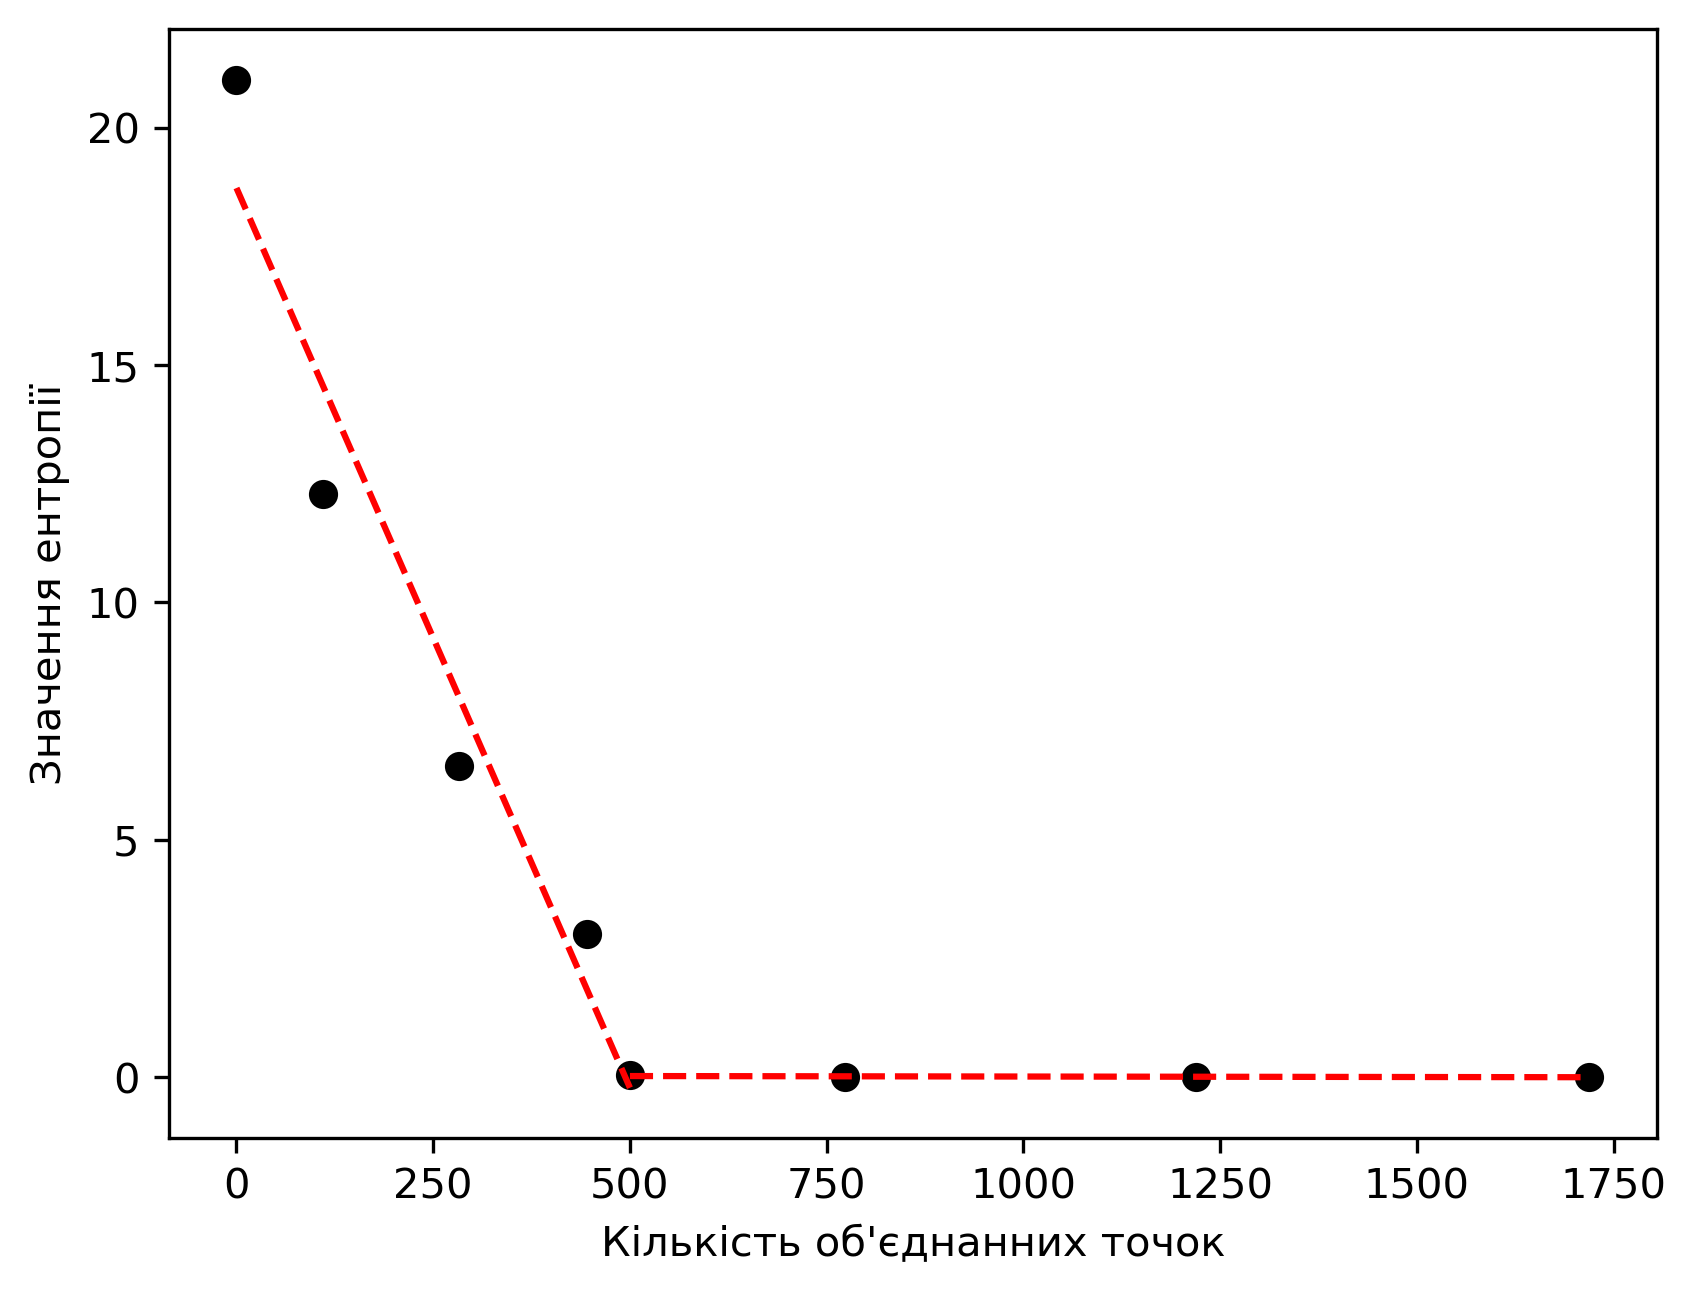

Clusters removed number:4


In [14]:
weights, means, covs = em_reduction.get_params()
merging = Merging(weights, means, covs, 'entropy', verbose=True)
merging.fit(data)

In [15]:
y_pred = merging.labels_

In [16]:
clustering_quality(data, y_pred)

Silhouette Score: 0.7001297865591
Calinski-Harabasz Index: 1642.4776234126427
Davies-Bouldin Index: 0.3716590306921181


<Axes: >

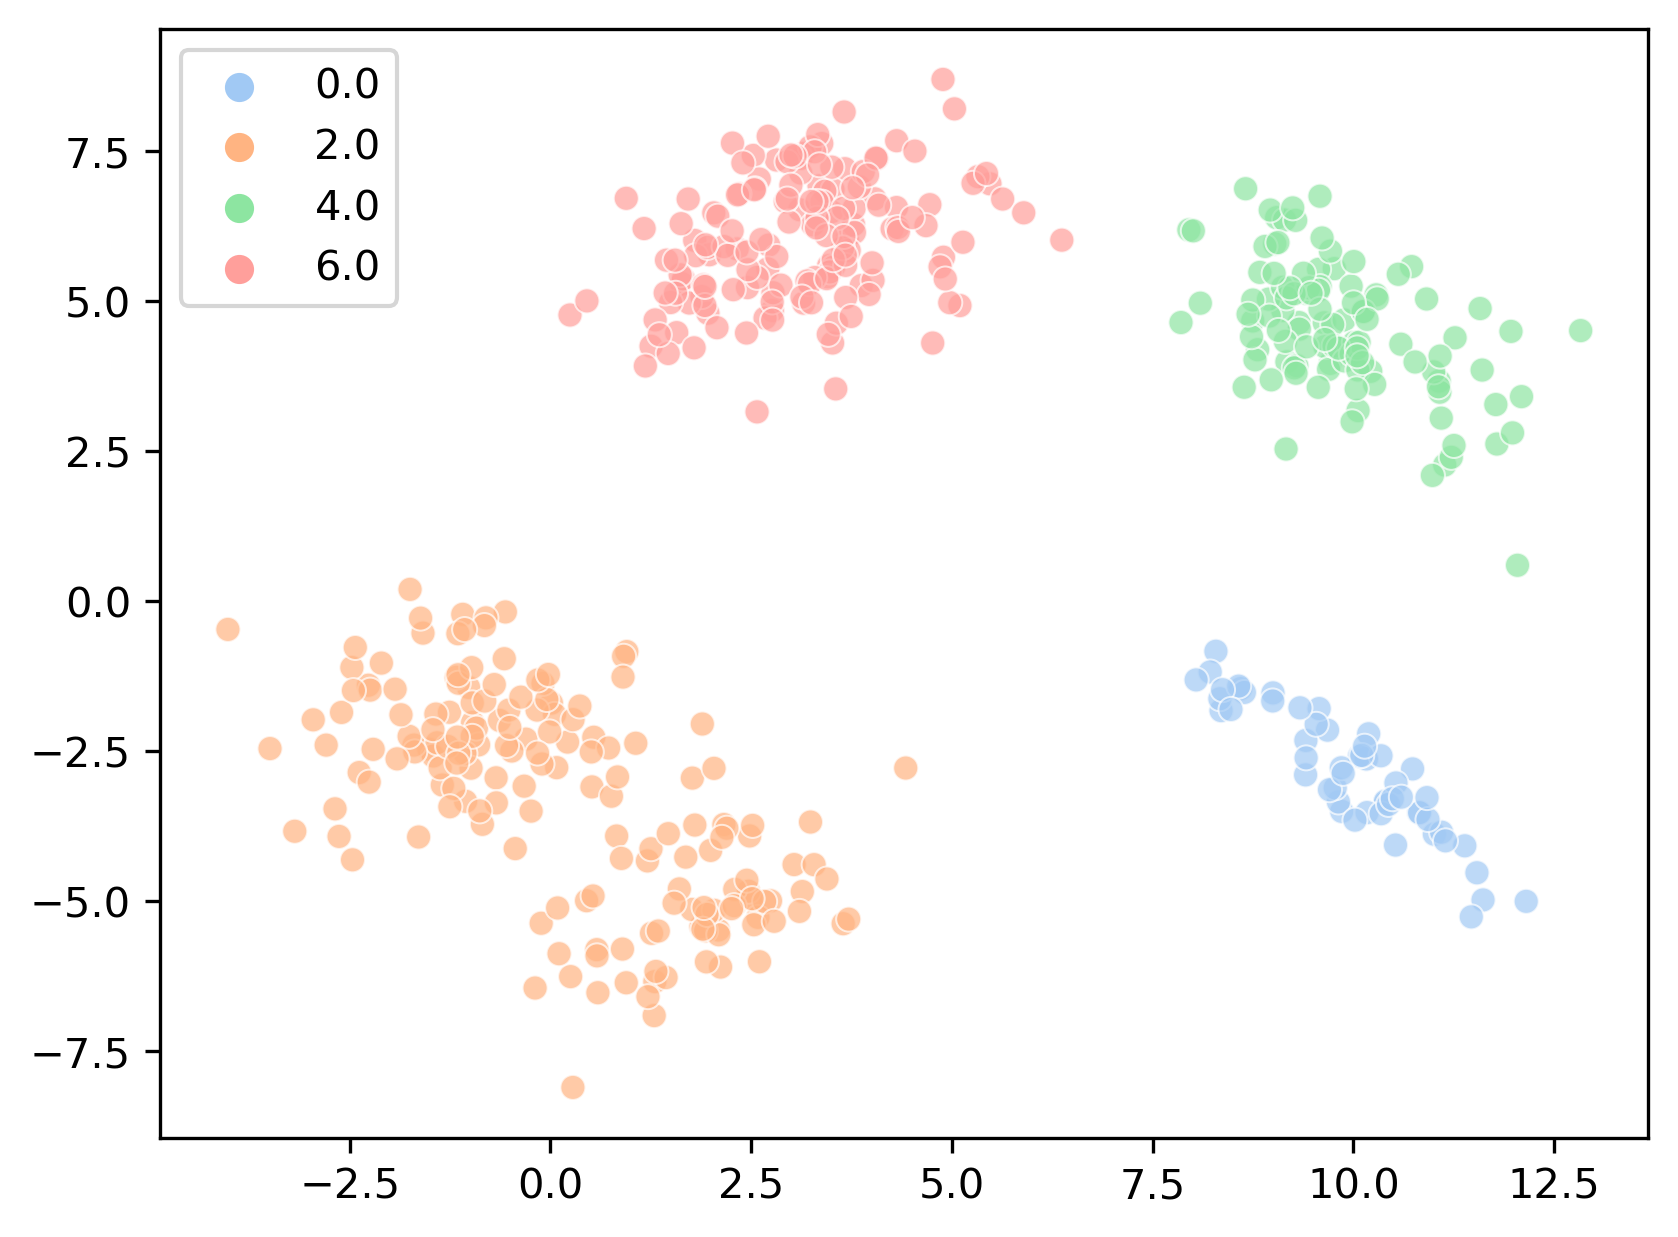

In [17]:
custom_palette = sns.color_palette("pastel", 49)
sns.scatterplot(x=data[:, 0], y=data[:, 1], 
                    alpha=0.7, 
                    hue=y_pred, 
                    palette="pastel")